## Python Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import os
from tqdm import tqdm 

from module.smatrix import Multilayer
from module.utility import constant_index, make_layer, load_data
'''
Si의 n과 k를 4000이하까지 확장하자.
'''

'\nSi의 n과 k를 4000이하까지 확장하자.\n'

In [2]:
from itertools import combinations, product, permutations

In [56]:
u=np.linspace(1000,2000,51)
w=np.linspace(2300,8000,20)

In [57]:
wavenumbers=np.append(u,w)
len(wavenumbers)

71

## Load Refractive index

In [58]:
#2020-08-09: 두께는 동일, 레벨만 변화시켜본다.
#2020-08-10: level을 맞추는 듯 했으나, 두께 오차가 생각보다 크다.->Fitting_n,k를 써보자. 원본은 SiO2의 굴절률이 급격히 변하면서 반사에서 반영이되어 나타났음.
#2020-08-16: k가 축소되면서, 전체적으로 원본과 레벨오차가 줄어들음.
#2020-08-22: level은 np.linspace를 이용, -100부터 100의 level dispersion을 만들자.
#2020-08-23: point를 801로 계산
#2020-08-28: level 범위 + -5%
#2020-12-02: nk-combination 적용

In [59]:
wavenumbers

array([1000., 1020., 1040., 1060., 1080., 1100., 1120., 1140., 1160.,
       1180., 1200., 1220., 1240., 1260., 1280., 1300., 1320., 1340.,
       1360., 1380., 1400., 1420., 1440., 1460., 1480., 1500., 1520.,
       1540., 1560., 1580., 1600., 1620., 1640., 1660., 1680., 1700.,
       1720., 1740., 1760., 1780., 1800., 1820., 1840., 1860., 1880.,
       1900., 1920., 1940., 1960., 1980., 2000., 2300., 2600., 2900.,
       3200., 3500., 3800., 4100., 4400., 4700., 5000., 5300., 5600.,
       5900., 6200., 6500., 6800., 7100., 7400., 7700., 8000.])

In [60]:
len(wavenumbers)

71

In [63]:
SiO2_n=pd.read_csv('refractive_index\combination_n.csv')
SiO2_k=pd.read_csv('refractive_index\combination_k.csv')

In [64]:
SiO2_n=SiO2_n.iloc[:,1:]

In [65]:
SiO2_n=SiO2_n[SiO2_n['Wavenumbers'].isin(wavenumbers)]
SiO2_n

,Wavenumbers,0,1,2,3,4,5,6,7,8,...,18910,18911,18912,18913,18914,18915,18916,18917,18918,18919
0,1000.0,1.224745,1.224745,1.224745,1.231981,1.231978,1.231971,1.231959,1.253440,1.253428,...,2.868625,2.868521,2.868296,2.920754,2.920773,2.920642,2.920360,2.977960,2.977979,2.977816
10,1020.0,1.224745,1.224745,1.224745,1.232539,1.232536,1.232527,1.232512,1.255633,1.255619,...,3.064522,3.064433,3.064201,3.117039,3.117100,3.116985,3.116693,3.174772,3.174840,3.174694
20,1040.0,1.224745,1.224745,1.224745,1.233205,1.233200,1.233189,1.233170,1.258244,1.258226,...,3.350980,3.350937,3.350728,3.402975,3.403122,3.403062,3.402795,3.460312,3.460481,3.460399
30,1060.0,1.224745,1.224745,1.224745,1.234011,1.234005,1.233990,1.233965,1.261402,1.261379,...,3.814276,3.814367,3.814265,3.863855,3.864198,3.864300,3.864162,3.918867,3.919268,3.919378
40,1080.0,1.224745,1.224745,1.224745,1.235008,1.235000,1.234979,1.234946,1.265300,1.265268,...,4.650327,4.650830,4.651124,4.693213,4.694091,4.694705,4.695057,4.741563,4.742612,4.743340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,6800.0,1.224745,1.224745,1.224745,1.224653,1.224653,1.224653,1.224653,1.224379,1.224379,...,1.537357,1.537357,1.537357,1.536119,1.536119,1.536119,1.536119,1.534734,1.534734,1.534734
3050,7100.0,1.224745,1.224745,1.224745,1.224661,1.224661,1.224661,1.224661,1.224411,1.224411,...,1.538367,1.538367,1.538367,1.537235,1.537235,1.537235,1.537235,1.535970,1.535970,1.535970
3200,7400.0,1.224745,1.224745,1.224745,1.224668,1.224668,1.224668,1.224668,1.224438,1.224438,...,1.539252,1.539252,1.539252,1.538213,1.538213,1.538213,1.538213,1.537052,1.537052,1.537052
3350,7700.0,1.224745,1.224745,1.224745,1.224674,1.224674,1.224674,1.224674,1.224462,1.224462,...,1.540031,1.540031,1.540031,1.539075,1.539075,1.539075,1.539075,1.538005,1.538005,1.538005


In [66]:
SiO2_k=SiO2_k.iloc[:,1:]

In [67]:
SiO2_k=SiO2_k[SiO2_k['Wavenumbers'].isin(wavenumbers)]
SiO2_k

,Wavenumbers,0,1,2,3,4,5,6,7,8,...,18910,18911,18912,18913,18914,18915,18916,18917,18918,18919
0,1000.0,0.0,0.0,0.0,1.282681e-05,1.153960e-04,2.177479e-04,3.196909e-04,5.042889e-05,4.536848e-04,...,0.100315,0.103132,0.105942,0.095848,0.099352,0.102853,0.106346,0.094107,0.098350,0.102590
10,1020.0,0.0,0.0,0.0,1.517957e-05,1.365539e-04,2.576301e-04,3.781452e-04,5.960157e-05,5.361742e-04,...,0.144452,0.147573,0.150686,0.139049,0.142933,0.146817,0.150691,0.136632,0.141341,0.146048
20,1040.0,0.0,0.0,0.0,1.823289e-05,1.640080e-04,3.093614e-04,4.539217e-04,7.148026e-05,6.429839e-04,...,0.228853,0.232279,0.235699,0.222088,0.226357,0.230627,0.234889,0.218531,0.223715,0.228901
30,1060.0,0.0,0.0,0.0,2.229575e-05,2.005326e-04,3.781509e-04,5.546075e-04,8.724640e-05,7.847228e-04,...,0.426692,0.430360,0.434025,0.417695,0.422269,0.426852,0.431431,0.411965,0.417535,0.423115
40,1080.0,0.0,0.0,0.0,2.786826e-05,2.506163e-04,4.724166e-04,6.924389e-04,1.088044e-04,9.784840e-04,...,1.096767,1.100418,1.104087,1.083118,1.087663,1.092246,1.096852,1.072212,1.077775,1.083384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,6800.0,0.0,0.0,0.0,1.390875e-08,1.251787e-07,2.364486e-07,3.477185e-07,5.564744e-08,5.008269e-07,...,0.000034,0.000039,0.000045,0.000028,0.000035,0.000043,0.000050,0.000028,0.000037,0.000046
3050,7100.0,0.0,0.0,0.0,1.214864e-08,1.093378e-07,2.065268e-07,3.037159e-07,4.860451e-08,4.374406e-07,...,0.000029,0.000034,0.000039,0.000025,0.000031,0.000037,0.000043,0.000025,0.000033,0.000040
3200,7400.0,0.0,0.0,0.0,1.067581e-08,9.608229e-08,1.814888e-07,2.668952e-07,4.271127e-08,3.844014e-07,...,0.000026,0.000030,0.000035,0.000022,0.000027,0.000033,0.000038,0.000022,0.000029,0.000035
3350,7700.0,0.0,0.0,0.0,9.433540e-09,8.490185e-08,1.603702e-07,2.358384e-07,3.774070e-08,3.396663e-07,...,0.000023,0.000027,0.000031,0.000019,0.000024,0.000029,0.000034,0.000019,0.000025,0.000031


In [68]:
SiO2_n=SiO2_n.iloc[:,1:].to_numpy()
SiO2_k=SiO2_k.iloc[:,1:].to_numpy()

In [7]:
nk_air = constant_index(1, wavenumbers)
# Si
si_n = load_data('refractive_index/Silicon_n.csv', wavenumbers)
si_k = load_data('refractive_index/Silicon_k.csv', wavenumbers)
nk_si = si_n + 1j * si_k

In [70]:
si_n

array([3.47727   , 3.47728   , 3.47728   , 3.47729   , 3.47729   ,
       3.4773    , 3.4773    , 3.47731   , 3.47731   , 3.47731   ,
       3.47732   , 3.47732   , 3.47733   , 3.47733   , 3.47733   ,
       3.47734   , 3.47734   , 3.47735   , 3.47735   , 3.47735   ,
       3.47736   , 3.47736   , 3.47737   , 3.47737   , 3.47738   ,
       3.47738   , 3.47738   , 3.47739   , 3.47739   , 3.4774    ,
       3.4774    , 3.47741   , 3.47741   , 3.47742   , 3.47742   ,
       3.47743   , 3.47743   , 3.47744   , 3.47744   , 3.47745   ,
       3.47745   , 3.47746   , 3.4774656 , 3.47747   , 3.47748   ,
       3.47748   , 3.47749   , 3.47749   , 3.4775    , 3.4775032 ,
       3.47751   , 3.47761   , 3.47772   , 3.47784   , 3.47798   ,
       3.47813571, 3.47831   , 3.47849   , 3.47869457, 3.47892   ,
       3.47915   , 3.47941   , 3.47968972, 3.47998599, 3.48030228,
       3.48064   , 3.48101   , 3.4814    , 3.48181744, 3.48226372,
       3.48274   ])

In [71]:
len(si_n)

71

In [72]:
nk_si

array([3.47727   +2.15000000e-05j, 3.47728   +2.00950704e-05j,
       3.47728   +1.94000000e-05j, 3.47729   +1.91000000e-05j,
       3.47729   +1.90000000e-05j, 3.4773    +1.90000000e-05j,
       3.4773    +1.91000000e-05j, 3.47731   +1.93000000e-05j,
       3.47731   +1.95000000e-05j, 3.47731   +1.97000000e-05j,
       3.47732   +1.99485915e-05j, 3.47732   +2.02000000e-05j,
       3.47733   +2.05000000e-05j, 3.47733   +2.07630282e-05j,
       3.47733   +2.10679577e-05j, 3.47734   +2.13728873e-05j,
       3.47734   +2.16778169e-05j, 3.47735   +2.19826855e-05j,
       3.47735   +2.22873239e-05j, 3.47735   +2.25922535e-05j,
       3.47736   +2.29000000e-05j, 3.47736   +2.32021127e-05j,
       3.47737   +2.35067138e-05j, 3.47737   +2.39000000e-05j,
       3.47738   +2.42000000e-05j, 3.47738   +2.45000000e-05j,
       3.47738   +2.48264085e-05j, 3.47739   +2.51310954e-05j,
       3.47739   +2.55000000e-05j, 3.4774    +2.58000000e-05j,
       3.4774    +2.61457746e-05j, 3.47741   +2.6450530

In [73]:
SiO2_n

array([[1.22474487, 1.22474487, 1.22474487, ..., 2.97796022, 2.97797944,
        2.97781644],
       [1.22474487, 1.22474487, 1.22474487, ..., 3.17477194, 3.17483983,
        3.17469399],
       [1.22474487, 1.22474487, 1.22474487, ..., 3.46031188, 3.46048085,
        3.46039877],
       ...,
       [1.22474487, 1.22474487, 1.22474487, ..., 1.53705172, 1.53705172,
        1.53705172],
       [1.22474487, 1.22474487, 1.22474487, ..., 1.53800507, 1.53800507,
        1.53800507],
       [1.22474487, 1.22474487, 1.22474487, ..., 1.53884953, 1.53884953,
        1.53884953]])

In [74]:
SiO2_n[:,-1]

array([2.97781644, 3.17469399, 3.46039877, 3.91937791, 4.74334041,
       4.58870185, 1.46318546, 0.81395173, 0.95311552, 1.73963288,
       2.48616685, 3.411151  , 5.13622338, 1.92202024, 0.52170117,
       0.26932607, 0.17909452, 0.13569206, 0.1114344 , 0.096893  ,
       0.08823234, 0.08389579, 0.08371667, 0.08936103, 0.10852095,
       0.19445492, 0.40610107, 0.55526038, 0.66180239, 0.74438868,
       0.81144096, 0.86751631, 0.91539655, 0.9569208 , 0.99337507,
       1.02569669, 1.05459099, 1.0806024 , 1.10415994, 1.12560757,
       1.14522509, 1.16324304, 1.17985341, 1.19521766, 1.20947275,
       1.22273574, 1.23510734, 1.24667481, 1.25751411, 1.26769178,
       1.27726632, 1.37355404, 1.42387815, 1.45433028, 1.47445567,
       1.48857453, 1.49891962, 1.50675589, 1.51285034, 1.51769308,
       1.52161065, 1.52482817, 1.52750538, 1.52975837, 1.53167332,
       1.53331535, 1.53473449, 1.5359697 , 1.53705172, 1.53800507,
       1.53884953])

In [75]:
len(SiO2_n[:,-1])

71

In [76]:
from numba import jit, cuda

## Data Set

In [3]:
#@jit(target="cuda")
def df_one_row(n_sio2, k_sio2, d_sio2_1,level, noise_level=0):    
    # Structure
    layer_air = make_layer(nk_air)
    #layer_igzo = make_layer(nk_igzo, thickness=d_igzo*1e-7, coherence=True)
    layer_sio2_1 = make_layer(n_sio2 + 1j*k_sio2, thickness=d_sio2_1*1e-7, coherence=True)
    layer_si = make_layer(nk_si, thickness=0.05, coherence=False)
    #layer_sio2_2 = make_layer(nk_sio2, thickness=d_sio2_2*1e-7, coherence=True)
    structure = [
        layer_air,
        layer_sio2_1,
        layer_si,
        layer_sio2_1,
        layer_air]
    
    R = Multilayer(structure, 0, 's', wavenumbers).R()
    noise = (2*np.random.rand(len(wavenumbers))-1)/100
    #T += noise * noise_level
    #R += level
    R += level/100
    #R *= 1+(2*np.random.rand()-1)/100
    R = R.reshape(1, -1)
    
    label = np.array([d_sio2_1]).reshape(1, -1)
    df_0 = pd.DataFrame(data=n_sio2.reshape(1, -1), columns=wavenumbers)
    df_1 = pd.DataFrame(data=k_sio2.reshape(1, -1), columns=wavenumbers)
    df_2 = pd.DataFrame(data=label, columns=['두께(nm)'])
    df_3= pd.DataFrame(data=[level], columns=['level']) #level 변환
    df_4 = pd.DataFrame(data=R, columns=wavenumbers)
    df = pd.concat([df_0,df_1,df_2,df_3,df_4], axis=1)
    return df

def linspace(a, b, step):
    out = []
    i = a
    while i <= b:
        out.append(i)
        i += step
    return out

In [4]:
def epsilon(wavenumbers, w_0, w_p, gamma):
    e1=np.power(w_p,2)*(w_0**2 - wavenumbers**2)/(( np.power(wavenumbers,2) - np.power(w_0,2) )**2+(w_0*gamma)**2)
    e2=wavenumbers * gamma * np.power(w_p,2) / ( (w_0*gamma)**2 + ( np.power(wavenumbers,2) - np.power(w_0,2) )**2)
    return e1+1j*e2

def refractive_index(wavenumbers, params ):
    paramsRest = params[1:] # params[j][0] #e_inf
    e_inf=params[0]
    e= e_inf + epsilon( wavenumbers, paramsRest[0], paramsRest[1][0], paramsRest[1][1] ) + epsilon( wavenumbers, paramsRest[2], paramsRest[3][0], paramsRest[3][1] ) 
    n=np.real(np.sqrt(e))
    k=np.imag(np.sqrt(e))
    return n,k

In [5]:
wavenumbers=np.linspace(1000,8000,71)

## Train Data

In [8]:
random.seed(0)
np.random.seed(0)
w_p=np.linspace(0,1000,11) #plasma frequency range(0,100,200,300...,1000)
gam=np.arange(1,33,8) #gamma range (1,9,17,25)
e_range=np.arange(1.5, 2.5, 0.1) #epsilon_inf range
parameters=list(product(w_p,gam))
peak_par=list(permutations(parameters,2))
set_param=[0,1097.7,0,1259.6,0]
df_list = []
d_i = 250
d_f = 300
step = 1
start_time = time.time()
end = np.power(((d_f - d_i)/step + 1),1)
i = 1
for i in tqdm(range(len(e_range))): 
    for j in range(len(peak_par)):
        set_param[0]=e_range[i]
        set_param[2]=peak_par[j][0]
        set_param[4]=peak_par[j][1]
        n_sio2,k_sio2=refractive_index(wavenumbers, set_param)
        for d_sio2_1 in linspace(d_i, d_f, step):
            for level in np.linspace(-4,4,5):        
                df = df_one_row(n_sio2, k_sio2, d_sio2_1, level, noise_level=0)
                df_list.append(df)
            
data = pd.concat(df_list).reset_index(drop=True)
#data.head()
data.head(10)

100%|██████████████████████████████████████████████████████████████████████████████| 10/10 [4:41:06<00:00, 1686.69s/it]


,1000.0,1100.0,1200.0,1300.0,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,...,7100.0,7200.0,7300.0,7400.0,7500.0,7600.0,7700.0,7800.0,7900.0,8000.0
0,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,...,0.156337,0.153524,0.150819,0.148209,0.145781,0.143682,0.141607,0.139836,0.138265,0.136791
1,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,...,0.176337,0.173524,0.170819,0.168209,0.165781,0.163682,0.161607,0.159836,0.158265,0.156791
2,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,...,0.196337,0.193524,0.190819,0.188209,0.185781,0.183682,0.181607,0.179836,0.178265,0.176791
3,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,...,0.216337,0.213524,0.210819,0.208209,0.205781,0.203682,0.201607,0.199836,0.198265,0.196791
4,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,...,0.236337,0.233524,0.230819,0.228209,0.225781,0.223682,0.221607,0.219836,0.218265,0.216791
5,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,...,0.155913,0.153133,0.150463,0.147891,0.145501,0.143442,0.141408,0.139680,0.138152,0.136723
6,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,...,0.175913,0.173133,0.170463,0.167891,0.165501,0.163442,0.161408,0.159680,0.158152,0.156723
7,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,...,0.195913,0.193133,0.190463,0.187891,0.185501,0.183442,0.181408,0.179680,0.178152,0.176723
8,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,...,0.215913,0.213133,0.210463,0.207891,0.205501,0.203442,0.201408,0.199680,0.198152,0.196723
9,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,1.224745,...,0.235913,0.233133,0.230463,0.227891,0.225501,0.223442,0.221408,0.219680,0.218152,0.216723


In [9]:
data.to_csv('train_same_layer_level_4per.csv', index=False)#level은 level의 크기 조정.
#ITO, NiCr---디스플레이 투명전극: 사용하는 것으로

In [10]:
int(0.1*len(data))

482460

In [11]:
data.describe()

,1000.0,1100.0,1200.0,1300.0,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,...,7100.0,7200.0,7300.0,7400.0,7500.0,7600.0,7700.0,7800.0,7900.0,8000.0
count,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,...,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06,4.824600e+06
mean,2.019051e+00,2.270070e+00,1.526138e+00,4.781217e-01,7.272152e-01,9.848786e-01,1.128187e+00,1.199745e+00,1.241511e+00,1.269332e+00,...,1.226368e-01,1.243281e-01,1.262614e-01,1.284029e-01,1.307935e-01,1.335304e-01,1.363575e-01,1.394785e-01,1.427955e-01,1.462053e-01
std,4.081913e-01,1.182668e+00,8.126877e-01,4.286738e-01,4.941892e-01,3.677824e-01,2.452944e-01,1.857074e-01,1.582228e-01,1.425598e-01,...,4.687772e-02,4.548514e-02,4.419584e-02,4.302252e-02,4.198602e-02,4.110787e-02,4.036012e-02,3.977041e-02,3.932487e-02,3.900856e-02
min,1.224745e+00,2.974217e-01,6.285139e-03,3.686430e-03,3.418037e-03,2.510634e-03,3.385014e-03,3.733928e-01,6.354732e-01,7.681181e-01,...,1.343780e-02,1.661026e-02,2.016659e-02,2.406513e-02,2.829828e-02,3.270766e-02,3.714607e-02,4.143834e-02,4.580401e-02,5.022099e-02
25%,1.688986e+00,1.417875e+00,1.018061e+00,1.541193e-01,1.362065e-01,8.040719e-01,9.946036e-01,1.088688e+00,1.139671e+00,1.174422e+00,...,8.799119e-02,9.048279e-02,9.380854e-02,9.767616e-02,1.009809e-01,1.038311e-01,1.071743e-01,1.111643e-01,1.154619e-01,1.186280e-01
50%,1.972288e+00,1.993663e+00,1.556676e+00,3.303404e-01,8.330813e-01,1.069478e+00,1.167179e+00,1.219178e+00,1.253880e+00,1.278157e+00,...,1.216236e-01,1.240779e-01,1.252731e-01,1.267481e-01,1.295968e-01,1.332110e-01,1.372825e-01,1.399883e-01,1.424683e-01,1.457288e-01
75%,2.343687e+00,3.178472e+00,2.163934e+00,7.782682e-01,1.162783e+00,1.253376e+00,1.302542e+00,1.336251e+00,1.361236e+00,1.376878e+00,...,1.528038e-01,1.537085e-01,1.560502e-01,1.600671e-01,1.618303e-01,1.632601e-01,1.648423e-01,1.675326e-01,1.712330e-01,1.754780e-01
max,2.997233e+00,5.111413e+00,3.036648e+00,1.549193e+00,1.549193e+00,1.549193e+00,1.549193e+00,1.549193e+00,1.549193e+00,1.549193e+00,...,2.474951e-01,2.443270e-01,2.412651e-01,2.382962e-01,2.355101e-01,2.349593e-01,2.347833e-01,2.349510e-01,2.404256e-01,2.475610e-01


In [ ]:
#이전자료 _ 두께 : 0 ~500 , level(-100,100,1%단위)-09
#1022_두께: 0 ~ 300, level(-10.0,10.0.0.1%단위): train_same_layer

In [12]:
data.describe()

,두께(nm),level(*5%),4500.0,4517.777777777777,4535.555555555556,4553.333333333333,4571.111111111111,4588.888888888889,4606.666666666667,4624.444444444444,...,8340.0,8357.777777777777,8375.555555555555,8393.333333333334,8411.111111111111,8428.888888888889,8446.666666666668,8464.444444444445,8482.222222222223,8500.0
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,...,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,249.950000,0.000000,20.716168,20.712301,20.734500,20.733278,20.746608,20.759785,20.769801,20.791995,...,23.779418,23.700562,23.700310,23.634827,23.623081,23.564699,23.535797,23.495955,23.452747,23.421882
std,144.338252,60.553295,10.755443,10.743233,10.739454,10.726839,10.718679,10.709890,10.699421,10.692600,...,9.763198,9.764159,9.729192,9.720064,9.695131,9.681452,9.670250,9.643596,9.629131,9.611329
min,0.000000,-100.000000,3.040559,3.048926,3.069534,3.078194,3.093465,3.108130,3.120758,3.138899,...,2.634832,2.515897,2.578183,2.501274,2.525313,2.469057,2.439228,2.438163,2.402181,2.388890
25%,124.975000,-50.000000,11.336532,11.366568,11.417420,11.452687,11.496360,11.540696,11.582586,11.631525,...,15.131034,15.068778,15.106244,15.063161,15.084564,15.055850,15.052267,15.047420,15.033809,15.033065
50%,249.950000,0.000000,18.668303,18.641885,18.640589,18.626254,18.624783,18.629919,18.632305,18.654327,...,26.318515,26.239454,26.219588,26.145055,26.119407,26.047020,26.007612,25.949594,25.891667,25.844574
75%,374.925000,50.000000,30.971574,30.958060,30.979206,30.964716,30.969578,30.972186,30.968988,30.981133,...,31.782366,31.683432,31.651253,31.562050,31.522550,31.440351,31.402658,31.338430,31.282284,31.234707
max,499.900000,100.000000,41.373813,41.392482,41.448225,41.467763,41.507368,41.545293,41.577036,41.625334,...,39.209411,39.140331,39.104754,39.038277,39.004143,38.940316,38.907706,38.846355,38.797489,38.756301


In [15]:
test=pd.read_csv('test_290_260.csv')
for i in range(7):
    test.iloc[i,1:]=test.iloc[i,1:]*100
test

,id,4500,4517.77778,4535.55556,4553.33333,4571.11111,4588.88889,4606.66667,4624.44444,4642.22222,...,8340,8357.77778,8375.55556,8393.33333,8411.11111,8428.88889,8446.66667,8464.44444,8482.22222,8500
0,0,13.570,13.445,13.337,13.201,13.095,12.964,12.850,12.733,12.617,...,18.818,18.929,19.057,19.155,19.281,19.395,19.494,19.596,19.699,19.792
1,1,16.591,16.545,16.436,16.246,16.067,15.941,15.851,15.751,15.635,...,14.549,14.626,14.728,14.819,14.900,14.996,15.083,15.181,15.239,15.321
2,2,16.393,16.248,16.085,15.957,15.862,15.786,15.710,15.609,15.499,...,15.451,15.530,15.638,15.755,15.859,15.963,16.036,16.119,16.216,16.289
3,3,17.325,17.188,17.053,16.939,16.825,16.719,16.599,16.470,16.363,...,13.924,14.032,14.148,14.239,14.303,14.406,14.505,14.598,14.690,14.752
4,4,17.553,17.401,17.277,17.159,17.050,16.934,16.789,16.660,16.562,...,13.266,13.362,13.447,13.536,13.646,13.740,13.821,13.916,13.989,14.079
5,5,17.561,17.446,17.343,17.269,17.195,17.088,16.937,16.781,16.674,...,13.534,13.609,13.697,13.790,13.863,13.938,14.024,14.095,14.155,14.206
6,6,16.521,16.410,16.304,16.204,16.070,15.968,15.866,15.757,15.625,...,14.485,14.542,14.633,14.740,14.854,14.943,15.041,15.133,15.229,15.297


In [16]:
test.to_csv('test_same_layer_percent_unit.csv', index=None)

In [6]:
a=pd.DataFrame(data.describe().iloc[1:,1])
a

,level(x0.001%)
mean,-0.051720
std,15.011096
min,-67.233620
25%,-10.208153
50%,0.012038
75%,10.064423
max,64.907662


4500.000000    0.134149
4517.777778    0.133132
4535.555556    0.132113
4553.333333    0.131099
4571.111111    0.130088
4588.888889    0.129079
4606.666667    0.128079
4624.444444    0.127077
4642.222222    0.126078
4660.000000    0.125091
4677.777778    0.124101
4695.555556    0.123115
4713.333333    0.122140
4731.111111    0.121164
4748.888889    0.120192
4766.666667    0.119224
4784.444444    0.118261
4802.222222    0.117303
4820.000000    0.116354
4837.777778    0.115409
4855.555556    0.114468
4873.333333    0.113531
4891.111111    0.112598
4908.888889    0.111672
4926.666667    0.110751
4944.444444    0.109839
4962.222222    0.108929
4980.000000    0.108028
4997.777778    0.107127
5015.555556    0.106237
                 ...   
7984.444444    0.101804
8002.222222    0.102785
8020.000000    0.103794
8037.777778    0.104739
8055.555556    0.105771
8073.333333    0.106784
8091.111111    0.107794
8108.888889    0.108824
8126.666667    0.109860
8144.444444    0.110909
8162.222222    0

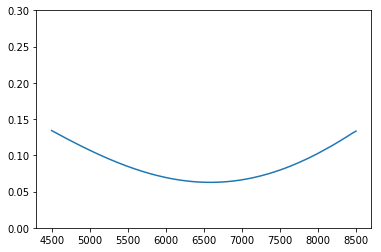

In [8]:
is_d_260_41=data.iloc[26042,2:]
#print(is_d_260_41)#real이 0.166정도,
plt.plot(wavenumbers, is_d_260_41)
plt.ylim(0,0.3)
plt.show()

In [7]:
for i in tqdm(range(len(data))):
    data.iloc[i,2:]=data.iloc[i,2:]+(data.iloc[i,1]/1000)

100%|██████████████████████████████████████████████████████████████████████████| 50001/50001 [00:43<00:00, 1139.52it/s]


In [8]:
data.tail()

,두께(nm),level(x0.001%),4500.0,4517.777777777777,4535.555555555556,4553.333333333333,4571.111111111111,4588.888888888889,4606.666666666667,4624.444444444444,...,8340.0,8357.777777777777,8375.555555555555,8393.333333333334,8411.111111111111,8428.888888888889,8446.666666666668,8464.444444444445,8482.222222222223,8500.0
49996,499.96,0.882877,0.162159,0.164588,0.167259,0.169722,0.172323,0.174927,0.177504,0.180199,...,0.267229,0.263040,0.262201,0.258716,0.257171,0.254026,0.251421,0.249316,0.246526,0.244187
49997,499.97,-15.085941,0.146202,0.148631,0.151302,0.153765,0.156367,0.158971,0.161547,0.164243,...,0.251243,0.247054,0.246214,0.242730,0.241184,0.238039,0.235434,0.233328,0.230538,0.228199
49998,499.98,12.714073,0.174013,0.176443,0.179114,0.181577,0.184179,0.186783,0.189360,0.192055,...,0.279026,0.274836,0.273997,0.270512,0.268966,0.265821,0.263215,0.261110,0.258319,0.255980
49999,499.99,-0.746315,0.160565,0.162994,0.165665,0.168129,0.170730,0.173335,0.175912,0.178607,...,0.265549,0.261358,0.260519,0.257034,0.255488,0.252342,0.249737,0.247631,0.244840,0.242501
50000,500.00,-17.338008,0.143985,0.146414,0.149085,0.151549,0.154151,0.156755,0.159332,0.162028,...,0.248940,0.244749,0.243910,0.240424,0.238878,0.235732,0.233126,0.231021,0.228230,0.225890


In [9]:
data.to_csv('train_same_layer_level_diff.csv',index=False)

In [51]:
test=pd.read_csv('test_290_260.csv')
test    

,id,4500,4517.77778,4535.55556,4553.33333,4571.11111,4588.88889,4606.66667,4624.44444,4642.22222,...,8340,8357.77778,8375.55556,8393.33333,8411.11111,8428.88889,8446.66667,8464.44444,8482.22222,8500
0,0,0.13570,0.13445,0.13337,0.13201,0.13095,0.12964,0.12850,0.12733,0.12617,...,0.18818,0.18929,0.19057,0.19155,0.19281,0.19395,0.19494,0.19596,0.19699,0.19792
1,1,0.16591,0.16545,0.16436,0.16246,0.16067,0.15941,0.15851,0.15751,0.15635,...,0.14549,0.14626,0.14728,0.14819,0.14900,0.14996,0.15083,0.15181,0.15239,0.15321


In [52]:
result=pd.read_csv('result_290_260.csv')
result

,Unnamed: 0,layer1,layer2,level
0,0,265.33557,265.57657,-56.175297
1,1,252.03413,252.11076,-51.428980


In [13]:
data.to_csv('train_p_2layer.csv', index=False)
#ITO, NiCr---디스플레이 투명전극: 사용하는 것으로

In [14]:
transmit=pd.read_csv('train_p_2layer.csv')

In [15]:
transmit.head()

,layer_1(nm),layer2(nm),4500.0,4505.005005005005,4510.01001001001,4515.015015015015,4520.02002002002,4525.025025025025,4530.03003003003,4535.035035035035,...,9454.954954954956,9459.95995995996,9464.964964964965,9469.96996996997,9474.974974974975,9479.97997997998,9484.984984984985,9489.98998998999,9494.994994994995,9500.0
0,0,0,0.536576,0.536567,0.536558,0.536548,0.536539,0.536530,0.536520,0.536511,...,0.265491,0.261872,0.258305,0.254787,0.251319,0.247899,0.244527,0.241201,0.237922,0.234687
1,1,1,0.535329,0.535320,0.535310,0.535301,0.535292,0.535282,0.535273,0.535264,...,0.264882,0.261272,0.257712,0.254203,0.250743,0.247331,0.243966,0.240648,0.237376,0.234149
2,2,2,0.538580,0.538571,0.538562,0.538552,0.538543,0.538534,0.538524,0.538515,...,0.266516,0.262884,0.259302,0.255771,0.252290,0.248857,0.245472,0.242133,0.238841,0.235595
3,3,3,0.534005,0.533996,0.533986,0.533977,0.533968,0.533959,0.533949,0.533940,...,0.264293,0.260692,0.257140,0.253639,0.250186,0.246782,0.243425,0.240115,0.236850,0.233631
4,4,4,0.532772,0.532763,0.532753,0.532744,0.532735,0.532726,0.532717,0.532708,...,0.263741,0.260147,0.256603,0.253110,0.249664,0.246267,0.242918,0.239615,0.236357,0.233144


In [16]:
print(transmit.iloc[269,2:])
print(transmit.iloc[269,0:2])

4500.0               0.799801
4505.005005005005    0.800261
4510.01001001001     0.800722
4515.015015015015    0.801181
4520.02002002002     0.801640
                       ...   
9479.97997997998     0.329710
9484.984984984985    0.325114
9489.98998998999     0.320580
9494.994994994995    0.316106
9500.0               0.311693
Name: 269, Length: 1000, dtype: float64
layer_1(nm)    269.0
layer2(nm)     269.0
Name: 269, dtype: float64


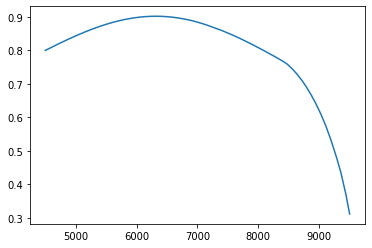

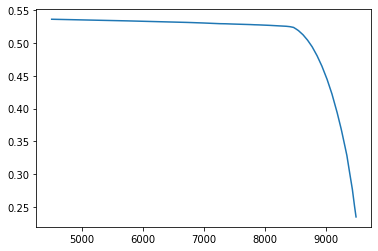

In [25]:
plt.subplot(111)
plt.plot(wavenumbers, transmit.iloc[269,2:])
plt.show()

plt.subplot(111)
plt.plot(wavenumbers, transmit.iloc[0,2:])
plt.show()

In [2]:
sdata=pd.read_csv('train_s_2layer.csv')
pdata=pd.read_csv('train_p_2layer.csv')

In [3]:
xdata=pd.DataFrame()
for i in range(len(sdata)):
    sdata.iloc[i,2:]=(sdata.iloc[i,2:]+pdata.iloc[i,2:])/2
    #print(type(ddata))
    #xdata.append(ddata)

In [4]:
sdata.tail()

,layer_1(nm),layer2(nm),4500.0,4505.005005005005,4510.01001001001,4515.015015015015,4520.02002002002,4525.025025025025,4530.03003003003,4535.035035035035,...,9454.954954954956,9459.95995995996,9464.964964964965,9469.96996996997,9474.974974974975,9479.97997997998,9484.984984984985,9489.98998998999,9494.994994994995,9500.0
296,296,296,0.837522,0.837970,0.838417,0.838862,0.839306,0.839750,0.840192,0.840634,...,0.309336,0.304993,0.300711,0.296489,0.292325,0.288219,0.284170,0.280177,0.276240,0.272357
297,297,297,0.838073,0.838519,0.838963,0.839407,0.839849,0.840290,0.840731,0.841170,...,0.307700,0.303380,0.299120,0.294919,0.290777,0.286692,0.282664,0.278693,0.274776,0.270913
298,298,298,0.838098,0.838541,0.838983,0.839424,0.839864,0.840303,0.840741,0.841177,...,0.305899,0.301604,0.297368,0.293192,0.289074,0.285013,0.281008,0.277060,0.273166,0.269326
299,299,299,0.839979,0.840421,0.840862,0.841301,0.841739,0.842176,0.842613,0.843048,...,0.304802,0.300522,0.296301,0.292139,0.288036,0.283989,0.279999,0.276065,0.272185,0.268359
300,300,300,0.838666,0.839104,0.839542,0.839978,0.840413,0.840846,0.841279,0.841711,...,0.302574,0.298325,0.294135,0.290003,0.285930,0.281913,0.277952,0.274046,0.270195,0.266397


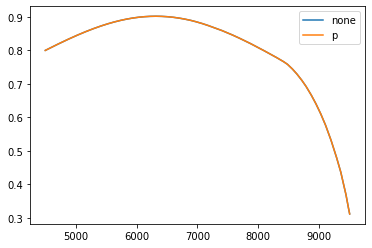

In [11]:
plt.subplot(111)
plt.plot(wavenumbers, sdata.iloc[269,2:], label='none')
plt.plot(wavenumbers, pdata.iloc[269,2:], label='p')
plt.legend()
plt.show()